OBJECTIVE : Loan default detection - using various classification algorithms predict loan default

IMPORT STATEMENTS 

In [2]:
#basic packages 
import pandas as pd 
import numpy as np 
#statistics 
import statistics 
from scipy import stats
#imputer 
from sklearn.impute import SimpleImputer as simplImp

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import matplotlib.image as mpimg
import pydotplus
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn import preprocessing as pp

/Users/deepthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


GETTING TEST AND TRAIN DATA

In [4]:
train_data = pd.read_csv("/Users/deepthi/Python_for_ML_from_scratch/loan_prediction/train.csv")
description = pd.read_csv("/Users/deepthi/Python_for_ML_from_scratch/loan_prediction/data_dictionary.csv")
test_data = pd.read_csv("/Users/deepthi/Python_for_ML_from_scratch/loan_prediction/compressed_test.csv.zip")

In [3]:
description[['Description']]


,Description
0,Identifier for customers
1,Payment default in the first EMI on due date
2,Amount of Loan disbursed
3,Cost of the Asset
4,Loan to Value of the asset
5,Branch where the loan was disbursed
6,Vehicle Dealer where the loan was disbursed
7,"Vehicle manufacturer(Hero, Honda, TVS etc.)"
8,Current pincode of the customer
9,Date of birth of the customer


In [4]:
'''# merging train and test 

target_variable = train_data['loan_default']
train_data=train_data.drop(columns=['loan_default'])
con= [train_data,test_data]
train_data = pd.concat(con,axis=0, join='outer')'''


"# merging train and test \n\ntarget_variable = train_data['loan_default']\ntrain_data=train_data.drop(columns=['loan_default'])\ncon= [train_data,test_data]\ntrain_data = pd.concat(con,axis=0, join='outer')"

In [5]:
train_data # merge of test and train 

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


understanding Train data 

In [3]:
train_data.shape #shape 

(233154, 41)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [5]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
train_data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

getting  numerical and categorical data separately


In [8]:
numerics=['int64','float64']
numerical_data = train_data.select_dtypes(include=numerics)
numerical_data.head()
list(numerical_data.columns)

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

In [9]:
others =['object']
others_data= train_data.select_dtypes(include=others)
others_data.head()

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [10]:
# uderstanding different categorical features 
others_data['Employment.Type'].unique() # salaried and self-employed
others_data['DisbursalDate'].unique()# completly in 2018 
others_data['PERFORM_CNS.SCORE.DESCRIPTION'].unique() # risks vs no data found (for diff reasons)
#DONE
others_data['AVERAGE.ACCT.AGE'].unique() #need to convert everything to months or years - simplicity 
others_data['CREDIT.HISTORY.LENGTH'].unique() #need to convert everything to months or years - simplicity - mark nan for 0 

array(['0yrs 0mon', '1yrs 11mon', '1yrs 3mon', '2yrs 0mon', '0yrs 2mon',
       '4yrs 8mon', '1yrs 7mon', '0yrs 7mon', '2yrs 3mon', '2yrs 9mon',
       '2yrs 1mon', '7yrs 2mon', '0yrs 1mon', '5yrs 6mon', '4yrs 7mon',
       '1yrs 9mon', '0yrs 11mon', '0yrs 10mon', '5yrs 10mon', '3yrs 1mon',
       '5yrs 4mon', '4yrs 10mon', '0yrs 4mon', '4yrs 0mon', '3yrs 9mon',
       '2yrs 11mon', '1yrs 8mon', '5yrs 2mon', '2yrs 10mon', '1yrs 2mon',
       '1yrs 5mon', '12yrs 10mon', '2yrs 2mon', '3yrs 8mon', '7yrs 5mon',
       '1yrs 0mon', '4yrs 2mon', '1yrs 10mon', '0yrs 6mon', '3yrs 2mon',
       '5yrs 1mon', '4yrs 3mon', '6yrs 9mon', '1yrs 1mon', '11yrs 0mon',
       '0yrs 9mon', '5yrs 0mon', '11yrs 2mon', '4yrs 1mon', '1yrs 4mon',
       '4yrs 9mon', '12yrs 11mon', '3yrs 7mon', '2yrs 5mon', '0yrs 3mon',
       '6yrs 6mon', '1yrs 6mon', '7yrs 4mon', '19yrs 3mon', '3yrs 0mon',
       '4yrs 6mon', '2yrs 7mon', '2yrs 8mon', '3yrs 11mon', '4yrs 11mon',
       '8yrs 1mon', '7yrs 7mon', '6yrs 7mon', '

FEATURE ENGINEERING - part 1 - dealing with NA values + conversion of date time features + replce & one hot encoding of categorical values 
------- 
Every feature is converted into numerical values 
 ------



In [13]:
train_data.isna().sum() #UNDERSTANDING THE COLUMNS THAT HAVE NAs and null
#train_data.shape 

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [ ]:
'''
train_data=train_data.dropna()
#removing NA's as the only conlumn that contains na is "employement type" - categorical value 
train_data.shape
'''

#train_data = pd.read_csv("/Users/deepthi/PYTHON/project3/train_data.csv.zip")

# instead of dropping replace the value with 1. others to preserve the data  
#train_data['Employment.Type']= train_data.replace({np.nan:'others'}) # others 


#method 2 - filling the na value with most occured value 
values = train_data['Employment.Type'].value_counts().idxmax()
train_data['Employment.Type'].fillna(value=values,inplace=True)
train_data['Employment.Type'].unique()


train_data.isna().sum()

#method 3 - using simple imputer 
''' Using simple Imputer bcz only one column has the missing values.
We can use IterativeImputer for dataset with more missing valued features  ''' 

imp= simplImp(missing_values = np.nan,strategy = 'most_frequent')
imp.fit_transform(train_data)




train_data['Employment.Type']=train_data['Employment.Type'].replace({'Salaried':1, 'Self employed':2}) # converted employee type into numerical using replace 


In [33]:
train_data.isna().sum()


UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [34]:
train_data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [35]:
train_data['DisbursalDate'] = pd.to_datetime(train_data['DisbursalDate'])
train_data['Date.of.Birth'] = pd.to_datetime(train_data['Date.of.Birth'])

train_data['date1'] = pd.to_datetime(str('2018-12-31'))


train_data['Age']  =abs(( train_data['Date.of.Birth']- train_data['date1']).astype('<m8[Y]') ).astype("int")




In [36]:
# dropping dob column
train_data=train_data.drop(columns=['Date.of.Birth','date1'],axis=1)


In [37]:
# cob=nversion of datetime dtype features into int (date time cant be applied to algorithm)
train_data['DisbursalDate']= train_data['DisbursalDate'].apply(lambda x: x.strftime('%d%m%Y'))
train_data['DisbursalDate']=train_data['DisbursalDate'].astype(str).astype(int)

In [38]:
def conversion(years):
    for x in years:
        initial = train_data[x].str.split(n=1,expand=True)
        initial['year']=initial[0].str.extract('(\d+)').astype(str).astype(int)
        initial['month'] =initial[1].str.extract('(\d+)').astype(str).astype(int)
        initial['sum'] =((initial['year']*12+initial['month'])/12).round(2)
        var=x+"new"
        train_data[var]=initial['sum']
years = ['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']        
conversion(years)

In [39]:
train_data=train_data.drop(['CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE'],axis=1)

In [40]:
print(train_data.dtypes)

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int64
DisbursalDate                            int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.AC

In [41]:
# one hot encoding - for PERFORM_CNS.SCORE.DESCRIPTION  - properly check the columns one wants to do one hot encoding - might slows down the algorithm 

#replace the no credit history found with notfound
train_data['PERFORM_CNS.SCORE.DESCRIPTION'].loc[train_data['PERFORM_CNS.SCORE.DESCRIPTION'].str.startswith("No") ]= "Not found"





/Users/deepthi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
train_data = pd.concat( [train_data,pd.get_dummies(train_data['PERFORM_CNS.SCORE.DESCRIPTION'])],axis=1 )


In [43]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int64
DisbursalDate                            int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.AC

In [44]:
train_data = train_data.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION'])

In [45]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int64
DisbursalDate                            int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.A

In [46]:
# COPYING THE RESULT FOR FURTHER ANALYSIS ON WHICH I CAN MAKE CHANGES TO 

final_data = train_data.copy()

In [47]:
final_data.shape

(233154, 54)

In [48]:
final_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                          int64
DisbursalDate                            int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.A

FEATURE ENGINEERING USING STATISTICS & INTUITION 
------


1. TO FIND OUT OUTLIERS AND REMOVING THEM 

2. 
    A) LOAN - BUCKET - ACTIVE / DEFAULT / CLOSED / TOTAL
    B) SANCTIONED/ DISBURSED AMOUNT - SUM OF PRIMARY AND SECONDARY 


In [31]:
# USING NUMERICAL DATA TO FINDOUT OUTLIERS 
numerical_data.shape
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  MobileNo_Avl_Flag                    233154 non-null  int64  
 11  Aadhar_flag  

In [32]:
# USING Z SCORES TO FIND OUT THE OUTLIERS IN THE DATA 
numerics=['int64','float64']
numerical_data = final_data.select_dtypes(include=numerics)

z=np.abs(stats.zscore(numerical_data))
z.shape


/Users/deepthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(233154, 40)

In [33]:
# remove the outliers over the threshold 
threshold = 3 
new_data = numerical_data[(z>3)]
new_data.shape
final_data.drop(new_data.index,axis =0, inplace =True)

/Users/deepthi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
len(list(final_data.columns) )# checking for the outlier removal 

54

STEP 2 : LOAN BUCKETS 

When a loan is sancationed - one would consider primary + secondary(optional) person's data to saction a loan - hence I am merging both the primary and secondary data in all the columns 


In [35]:
final_data['total_loans']= final_data['PRI.NO.OF.ACCTS'] + final_data['SEC.NO.OF.ACCTS']
final_data['total_active'] = final_data['SEC.ACTIVE.ACCTS'] + final_data['PRI.ACTIVE.ACCTS']
final_data['total_default'] = final_data['PRI.OVERDUE.ACCTS'] + final_data['SEC.OVERDUE.ACCTS']
final_data['sanctioned_amount']= final_data['PRI.SANCTIONED.AMOUNT'] + final_data['SEC.SANCTIONED.AMOUNT']
final_data['current_loanamount']=abs(final_data['SEC.CURRENT.BALANCE']+final_data['PRI.CURRENT.BALANCE'])
final_data['disbursed_amount']=final_data['PRI.DISBURSED.AMOUNT']+final_data['SEC.DISBURSED.AMOUNT']


In [36]:
final_data=final_data.drop(columns=['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS',
                                    'SEC.ACTIVE.ACCTS','PRI.ACTIVE.ACCTS',
                                    'PRI.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS',
                                    'PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT',
                                    'SEC.CURRENT.BALANCE','PRI.CURRENT.BALANCE',
                                    'PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT'])


#mergng and removing columns

In [37]:
# now let us test for the flags of KYC 
flags  = final_data[['MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
'loan_default']]


print(flags.isna().sum())
corr_1 = flags.corr()
corr_1



MobileNo_Avl_Flag    0
Aadhar_flag          0
PAN_flag             0
VoterID_flag         0
Driving_flag         0
Passport_flag        0
loan_default         0
dtype: int64


,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,loan_default
MobileNo_Avl_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aadhar_flag,NaN,1.000000,NaN,-0.958800,NaN,NaN,-0.036046
PAN_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VoterID_flag,NaN,-0.958800,NaN,1.000000,NaN,NaN,0.034056
Driving_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Passport_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_default,NaN,-0.036046,NaN,0.034056,NaN,NaN,1.000000


voter_id and Adhar_id are highly correlated - 0.03 correlated with loan_default 
-----
lets combine the KYC details  
-----

In [38]:
kyc_score = final_data[['MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
]]
final_data['kyc_score'] = round((kyc_score.sum(axis=1)/6),2)

In [39]:
final_data['kyc_score']

0         0.33
1         0.33
2         0.33
3         0.33
4         0.33
          ... 
233149    0.33
233150    0.33
233151    0.33
233152    0.33
233153    0.33
Name: kyc_score, Length: 178848, dtype: float64

In [40]:
#dropping all the kyc columns 

kyc_score = ['MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
]
final_data=final_data.drop(columns = kyc_score,axis=1)


In [41]:
final_data

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,...,K-High Risk,L-Very High Risk,M-Very High Risk,Not found,total_loans,total_active,total_default,sanctioned_amount,current_loanamount,kyc_score
0,420825,0,58400,89.55,67,22807,45,1441,1,8032018,...,0,0,0,1,0,0,0,0,0,0.33
1,537409,50200,65550,73.23,67,22807,45,1502,2,26092018,...,0,0,0,0,1,1,1,50200,27600,0.33
2,417566,0,61360,89.63,67,22807,45,1497,2,8012018,...,0,0,0,1,0,0,0,0,0,0.33
3,624493,0,66113,88.48,67,22807,45,1501,2,26102018,...,0,1,0,0,3,0,0,0,0,0.33
4,539055,0,60300,88.39,67,22807,45,1495,2,26092018,...,0,0,0,1,0,0,0,0,0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,416133,105405,60.72,34,20700,48,1050,1,26102018,...,0,0,0,0,4,3,0,416133,390443,0.33
233150,606141,0,100600,74.95,34,23775,51,990,2,23102018,...,0,0,0,0,1,0,0,0,0,0.33
233151,613658,0,71212,48.45,77,22186,86,2299,1,24102018,...,0,0,0,1,0,0,0,0,0,0.33
233152,548084,0,73286,49.10,77,22186,86,2299,1,29092018,...,0,0,0,1,0,0,0,0,0,0.33


In [42]:
len(final_data.dtypes)

42

In [43]:
# finding correlation
#correlation of all features 

corr =final_data.corr()
mean = corr.mean().mean()
corr_target =abs(corr['loan_default'])
imp_features = corr[corr_target >0.05]
imp_features = imp_features.index

final_data = final_data[imp_features]
corr1=final_data.corr()


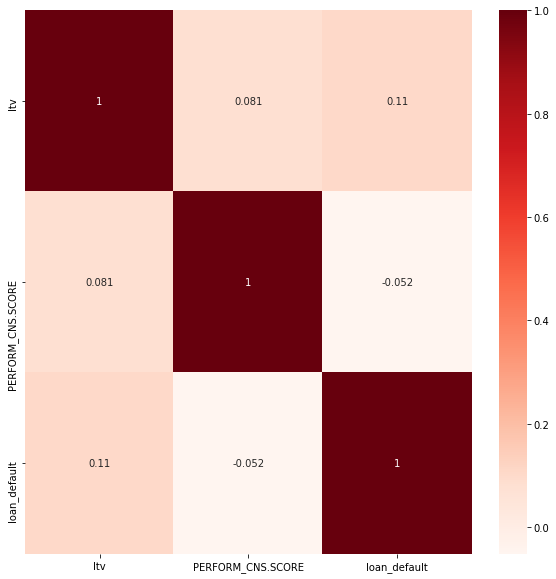

In [44]:
#plot figure 
plt.figure(figsize=(10,10))
sns.heatmap(corr1, annot=True, cmap=plt.cm.Reds)
plt.show()


there is high correlation between sanctioned and disbursed amount - we need to use either one of them ! 

In [45]:
diff = final_data[['sanctioned_amount','disbursed_amount','loan_default']]
corr_1 = diff.corr()

corr_1


KeyError: "['disbursed_amount', 'sanctioned_amount'] not in index"

In [ ]:
final_data.drop(columns=['sanctioned_amount'])
len(final_data.columns)

In [ ]:
undef = final_data[['AVERAGE.ACCT.AGEnew',
       'CREDIT.HISTORY.LENGTHnew','loan_default']]

undef_corr = undef.corr()
undef_corr

# should figure out a way to improve working on correlated features 

In [ ]:
cns = final_data[['PERFORM_CNS.SCORE','A-Very Low Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk',
       'G-Low Risk', 'H-Medium Risk', 'I-Medium Risk', 'J-High Risk',
       'K-High Risk', 'L-Very High Risk', 'M-Very High Risk', 'Not found','loan_default']]
cns_corr= cns.corr()
cns_corr

In [ ]:
disb = final_data[['disbursed_amount','asset_cost','loan_default']]
disb_corr = disb.corr()
disb_corr

#didnt understand - 1.disb amount -vely correlated to asset_cost

In [ ]:
emp_type = final_data[['Employment.Type','loan_default']]
emp_corr= emp_type.corr()
emp_corr

In [ ]:
fresh = final_data[['NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','loan_default']]
corr1= fresh.corr()
corr1

In [ ]:
inst_data = final_data[[ 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','loan_default']]
inst_corr=inst_data.corr()
inst_corr

In [ ]:
enquiries = final_data[['NO.OF_INQUIRIES','NEW.ACCTS.IN.LAST.SIX.MONTHS','loan_default']]
corr_enq=enquiries.corr()
corr_enq

THERE ARE NO LOANS + NO SANCTIONED + NO  DISBURSED AMOUNT  + NO NEW LOANS TAKEN + NO NEW LOAN DEFAULTED - WE CAN DROP THOSE ROWS 

In [42]:
final_data.shape

(178848, 42)

In [43]:
final_data.drop(final_data[final_data['total_loans']==0].index,inplace=True)
final_data=final_data.reset_index()
final_data.shape

(77971, 43)

NameError: name 'cns_corr' is not defined

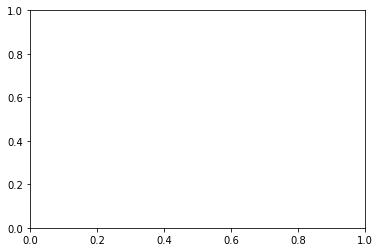

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cns_corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

In [ ]:
'''matplotlib.style.use('ggplot')
plt.scatter(train_data['total_overdue_accts'],train_data['loan_default'])
plt.show()'''


#train_data['total_overdue_accts'].unique()

In [45]:
# apply this to an algorithm - to check for the output - casual 

# features and traget division 

features = final_data.drop(columns=['loan_default'],axis=0)
target = final_data['loan_default']

In [ ]:
# understanding shape of the target and feature

print(features.shape) # 178848 rows + 54 columns 
print(target.shape)#178848 rows


features.dtypes

In [ ]:
#features[features['current_loanamount']<0]

In [108]:
# lets see how pca is applied and how the results vary 
X_stand = pp.StandardScaler().fit_transform(features)
#covariance 
covariance_matrix = np.cov(X_stand.T)

#eigen values and vectors 
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values
eigen_vectors

# getting final train data after finding PC
projection_matrix = (eigen_vectors[:10]).T
X_pca = X_stand.dot(projection_matrix)
X_pca.shape

# understanding the % of data pcs contains 

sum_ei = [(i/sum(eigen_values)*100) for i in eigen_values]
cum_sum =np.cumsum(sum)

TypeError: 'numpy.float64' object is not callable

In [109]:

sum_eig=0
for i in eigen_values:
    sum_eig = sum_eig+i
sum_eigen = [(i/sum_eig*100) for i in eigen_values]
sum_eigen.sort(reverse=True)
cum_sum = np.cumsum(sum_eigen)
cum_sum

array([  9.47569895,  15.36087268,  20.88805405,  25.56488424,
        30.06725361,  34.06466616,  37.48378906,  40.76641391,
        43.63446599,  46.35920842,  49.05154252,  51.69726515,
        54.26754465,  56.80324139,  59.32704999,  61.82234344,
        64.3098091 ,  66.76640087,  69.20470062,  71.62873614,
        74.01277017,  76.37734341,  78.7025977 ,  80.97357883,
        83.10893167,  85.19868176,  87.11098857,  88.95325632,
        90.6932968 ,  92.40918526,  93.95721964,  95.42930847,
        96.67342147,  97.81517518,  98.45496637,  99.01456877,
        99.55456802,  99.82589329,  99.98632534,  99.99698808,
       100.        , 100.        ])

Text(0.5, 1.0, 'Principal components and their information % ')

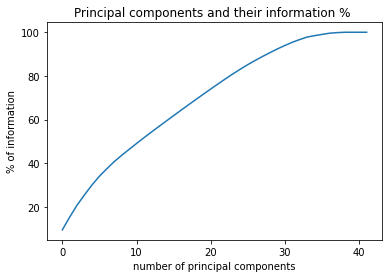

In [104]:
sns.lineplot(x=range(42), y = cum_sum)
plt.xlabel('number of principal components')
plt.ylabel('% of information')
plt.title('Principal components and their information % ')


## feature selection - univariate feature selection 

X_new = SelectKBest(chi2, k=8).fit_transform(features, target)
X_new.shape

In [ ]:
# test_train_split 

X_train,X_test,y_train,y_test = train_test_split(features ,target,test_size=0.20, random_state=6 )
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


In [ ]:
ks =10 
mean_acc=np.zeros(ks-1)
std_acc=np.zeros(ks-1)
confusionMatrix=[]
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
print( "The best accuracy is when k = ", mean_acc.max(), "with k=", mean_acc.argmax()+1)


In [ ]:
k=8
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

In [ ]:
# predicting Y 
yhat = neigh.predict(X_test)
yhat[0:5]

In [ ]:
yhat

In [ ]:
#yhat = pd.DataFrame(yhat,columns=['loan_default_yhat'])
y_test = pd.DataFrame(y_test, columns=['loan_default_yests'])


In [ ]:
type(y_test)

In [ ]:
type(yhat)
type(ytest)


output = pd.merge(yhat,ytest,on='loan_default')

In [ ]:
y_test=y_test.reset_index(drop=True)
ytest = pd.DataFrame(y_test)

In [ ]:
ytest['loan_default_yhat'] = yhat['loan_default_yhat']

In [ ]:
ytest.corr()

In [ ]:
out

In [ ]:
d= pd.concat([y_test,yhat],axis=1)

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)


In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train);


In [ ]:
predictions = rf.predict(X_test)


In [ ]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
errors

In [ ]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
